In [2]:
# Libraries

%matplotlib inline


import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import sklearn as skl
import scipy as sci
import scipy.io as sio
import statsmodels.api as sm

from sklearn import linear_model, model_selection, metrics, preprocessing, decomposition, cluster
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy import stats

import dateutil.parser as parser

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Data paths

from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

data_path='/content/drive/MyDrive/2022_SFC_IDSP/Project/Python_Notebooks/UK-Dataset/Clean-Datasets/'

results_path='/content/drive/My Drive/2022_SFC_IDSP/Project/Python_Notebooks/UK-Dataset/Clean-Datasets/'

Mounted at /content/drive/


## Read the data and add columns

In [4]:
wD_wide = pd.read_excel(data_path+'wide_water_data.xlsx')
wD_wide.rename(columns={'sample.samplingPoint.easting' : 'Location_east'}, inplace=True)
wD_wide.dropna(inplace=True)
wD_wide

sample.samplingPoint.notation  Location_east sample.sampleDateTime  \
0                         AN-01M02         463800   2016-01-13 11:13:00   
1                         AN-01M02         463800   2016-02-18 13:51:00   
2                         AN-01M02         463800   2016-03-14 13:18:00   
3                         AN-01M02         463800   2016-06-03 11:42:00   
4                         AN-01M02         463800   2016-06-21 10:37:00   
...                            ...            ...                   ...   
2189                   AN-MISCTL59         550000   2016-12-12 12:35:00   
2190                   AN-MISCTL59         550000   2016-12-12 13:15:00   
2198                   AN-MISCTL86         580000   2016-06-15 14:00:00   
2212                   AN-MISCTL98         590000   2016-07-12 13:10:00   
2218                   AN-MISCTM09         600000   2016-01-14 11:45:00   

          NH4    NH3  Conducivity     NO3     NO2  Diss.O2  Temperature    pH  
0     0.00038  0.030        546.0   4.250  0.0142    10.70          5.1  8.26  
1     0.00022  0.035        502.0   2.720  0.0088    11.00          5.4  7.68  
2     0.00057  0.039        615.0   4.620  0.0111    12.30          7.0  8.00  
3     0.00096  0.051        704.0   3.200  0.0264    10.50         10.4  8.31  
4     0.00057  0.044        546.0   2.290  0.0270     8.96         14.6  7.70  
...       ...    ...          ...     ...     ...      ...          ...   ...  
2189  0.00177  0.149       2120.0   0.194  0.0057    11.00          6.3  7.93  
2190  0.00757  0.835       2058.0   0.181  0.0186     7.48          7.3  7.78  
2198  0.00217  0.107        820.0   6.110  0.0991     9.72         15.8  7.86  
2212  0.00281  0.351        807.0   0.580  0.0102     2.16         16.4  7.43  
2218  0.00080  0.077        918.0  10.100  0.0424    11.20          5.2  7.91  

[1406 rows x 11 columns]

In [5]:
# Create a season column

wD_wide['Seasons'] = wD_wide['sample.sampleDateTime'].dt.month%12 // 3 + 1

dict = {1 : 'Winter', 2 : 'Spring', 3 : 'Summer', 4 : 'Autumn'}
wD_wide=wD_wide.replace({'Seasons': dict})
wD_wide.head()

sample.samplingPoint.notation  Location_east sample.sampleDateTime      NH4  \
0                      AN-01M02         463800   2016-01-13 11:13:00  0.00038   
1                      AN-01M02         463800   2016-02-18 13:51:00  0.00022   
2                      AN-01M02         463800   2016-03-14 13:18:00  0.00057   
3                      AN-01M02         463800   2016-06-03 11:42:00  0.00096   
4                      AN-01M02         463800   2016-06-21 10:37:00  0.00057   

     NH3  Conducivity   NO3     NO2  Diss.O2  Temperature    pH Seasons  
0  0.030        546.0  4.25  0.0142    10.70          5.1  8.26  Winter  
1  0.035        502.0  2.72  0.0088    11.00          5.4  7.68  Winter  
2  0.039        615.0  4.62  0.0111    12.30          7.0  8.00  Spring  
3  0.051        704.0  3.20  0.0264    10.50         10.4  8.31  Summer  
4  0.044        546.0  2.29  0.0270     8.96         14.6  7.70  Summer

In [6]:
# Create a location column

wD_wide.loc[wD_wide.Location_east<520000,'Region']='Region1'
wD_wide.loc[wD_wide.Location_east>560000,'Region']='Region3'
wD_wide.Region.fillna('Region2', inplace=True)

wD_wide

sample.samplingPoint.notation  Location_east sample.sampleDateTime  \
0                         AN-01M02         463800   2016-01-13 11:13:00   
1                         AN-01M02         463800   2016-02-18 13:51:00   
2                         AN-01M02         463800   2016-03-14 13:18:00   
3                         AN-01M02         463800   2016-06-03 11:42:00   
4                         AN-01M02         463800   2016-06-21 10:37:00   
...                            ...            ...                   ...   
2189                   AN-MISCTL59         550000   2016-12-12 12:35:00   
2190                   AN-MISCTL59         550000   2016-12-12 13:15:00   
2198                   AN-MISCTL86         580000   2016-06-15 14:00:00   
2212                   AN-MISCTL98         590000   2016-07-12 13:10:00   
2218                   AN-MISCTM09         600000   2016-01-14 11:45:00   

          NH4    NH3  Conducivity     NO3     NO2  Diss.O2  Temperature    pH  \
0     0.00038  0.030        546.0   4.250  0.0142    10.70          5.1  8.26   
1     0.00022  0.035        502.0   2.720  0.0088    11.00          5.4  7.68   
2     0.00057  0.039        615.0   4.620  0.0111    12.30          7.0  8.00   
3     0.00096  0.051        704.0   3.200  0.0264    10.50         10.4  8.31   
4     0.00057  0.044        546.0   2.290  0.0270     8.96         14.6  7.70   
...       ...    ...          ...     ...     ...      ...          ...   ...   
2189  0.00177  0.149       2120.0   0.194  0.0057    11.00          6.3  7.93   
2190  0.00757  0.835       2058.0   0.181  0.0186     7.48          7.3  7.78   
2198  0.00217  0.107        820.0   6.110  0.0991     9.72         15.8  7.86   
2212  0.00281  0.351        807.0   0.580  0.0102     2.16         16.4  7.43   
2218  0.00080  0.077        918.0  10.100  0.0424    11.20          5.2  7.91   

     Seasons   Region  
0     Winter  Region1  
1     Winter  Region1  
2     Spring  Region1  
3     Summer  Region1  
4     Summer  Region1  
...      ...      ...  
2189  Winter  Region2  
2190  Winter  Region2  
2198  Summer  Region3  
2212  Summer  Region3  
2218  Winter  Region3  

[1406 rows x 13 columns]

In [7]:
# Convert Location_east column to str so it won't be part of the next calculations

wD_wide['Location_east'] = wD_wide['Location_east'].astype(str)  
wD_wide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 0 to 2218
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   sample.samplingPoint.notation  1406 non-null   object        
 1   Location_east                  1406 non-null   object        
 2   sample.sampleDateTime          1406 non-null   datetime64[ns]
 3   NH4                            1406 non-null   float64       
 4   NH3                            1406 non-null   float64       
 5   Conducivity                    1406 non-null   float64       
 6   NO3                            1406 non-null   float64       
 7   NO2                            1406 non-null   float64       
 8   Diss.O2                        1406 non-null   float64       
 9   Temperature                    1406 non-null   float64       
 10  pH                             1406 non-null   float64       
 11  Seasons          

In [8]:
wD_wide.groupby('Region').count()

sample.samplingPoint.notation  Location_east  sample.sampleDateTime  \
Region                                                                         
Region1                            491            491                    491   
Region2                            462            462                    462   
Region3                            453            453                    453   

         NH4  NH3  Conducivity  NO3  NO2  Diss.O2  Temperature   pH  Seasons  
Region                                                                        
Region1  491  491          491  491  491      491          491  491      491  
Region2  462  462          462  462  462      462          462  462      462  
Region3  453  453          453  453  453      453          453  453      453

## Statistics

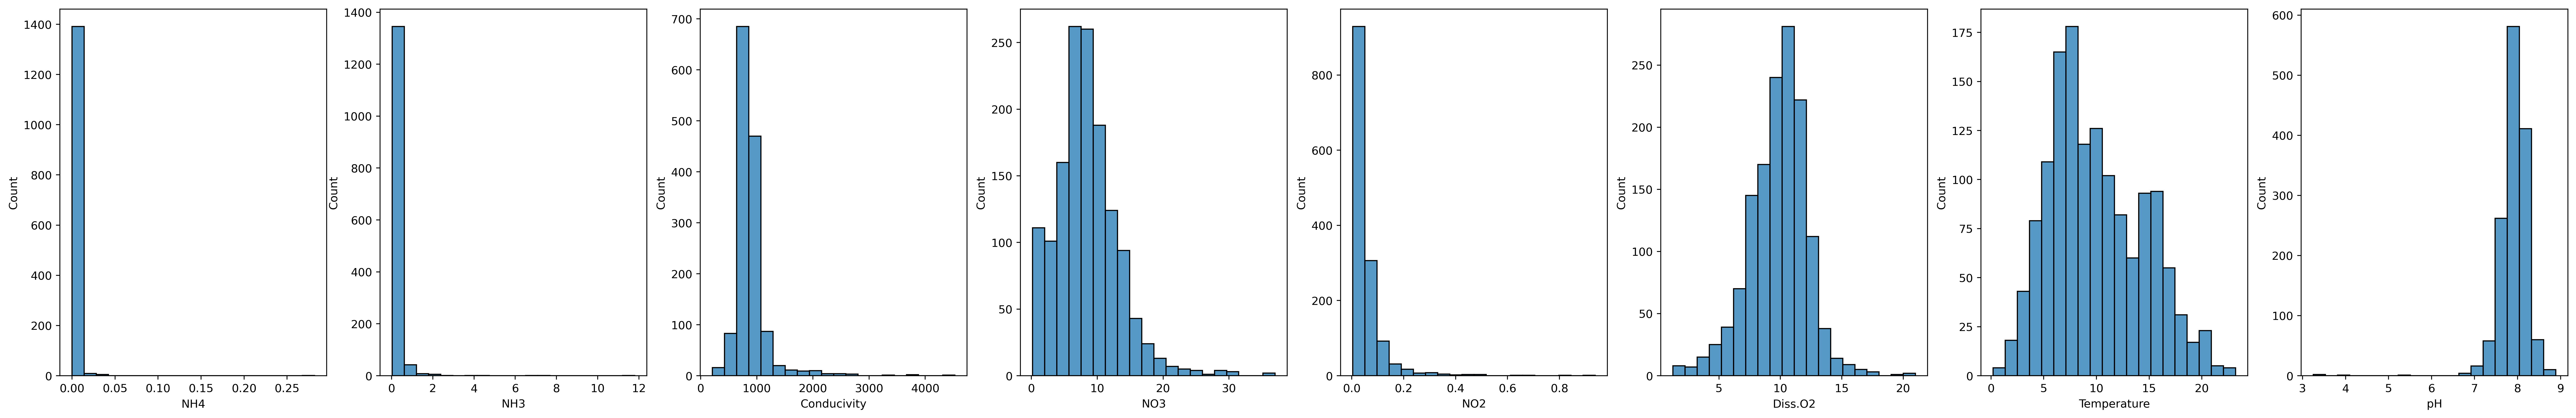

In [9]:
# Check count for each parameter

wD_sel = wD_wide.iloc[:,wD_wide.columns.get_loc("NH4"):wD_wide.columns.get_loc("pH")+1]

fig = plt.figure(1,figsize=(40,6), dpi = 400)

for i, col in enumerate(wD_sel.columns,1):
  fig.add_subplot(1,8,i,)
  sns.histplot(data=wD_sel, x=col, bins=20)
  

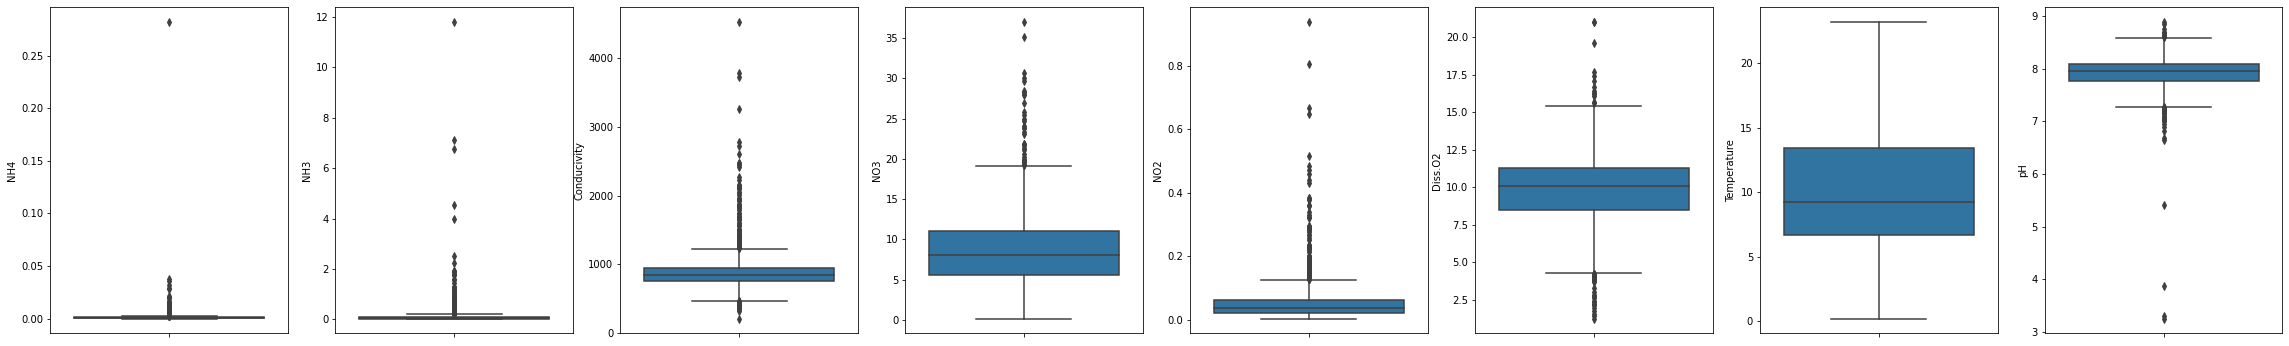

In [238]:
fig = plt.figure(1,figsize=(40,6))

for i, col in enumerate(wD_sel.columns,1):
  fig.add_subplot(1,8,i,)
  sns.boxplot(data=wD_sel, y=col)

In [239]:
# Clean the data by removing some outliers

wD_clean = wD_wide.loc[wD_wide['pH'] > 7].copy()
wD_clean = wD_clean.loc[wD_wide['Conducivity'] < 1500].copy()
wD_clean = wD_clean.loc[wD_wide['NH3'] < 0.4].copy()
wD_clean = wD_clean.loc[wD_wide['NO2'] < 0.2].copy()

wD_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 2218
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   sample.samplingPoint.notation  1254 non-null   object        
 1   Location_east                  1254 non-null   object        
 2   sample.sampleDateTime          1254 non-null   datetime64[ns]
 3   NH4                            1254 non-null   float64       
 4   NH3                            1254 non-null   float64       
 5   Conducivity                    1254 non-null   float64       
 6   NO3                            1254 non-null   float64       
 7   NO2                            1254 non-null   float64       
 8   Diss.O2                        1254 non-null   float64       
 9   Temperature                    1254 non-null   float64       
 10  pH                             1254 non-null   float64       
 11  Seasons          

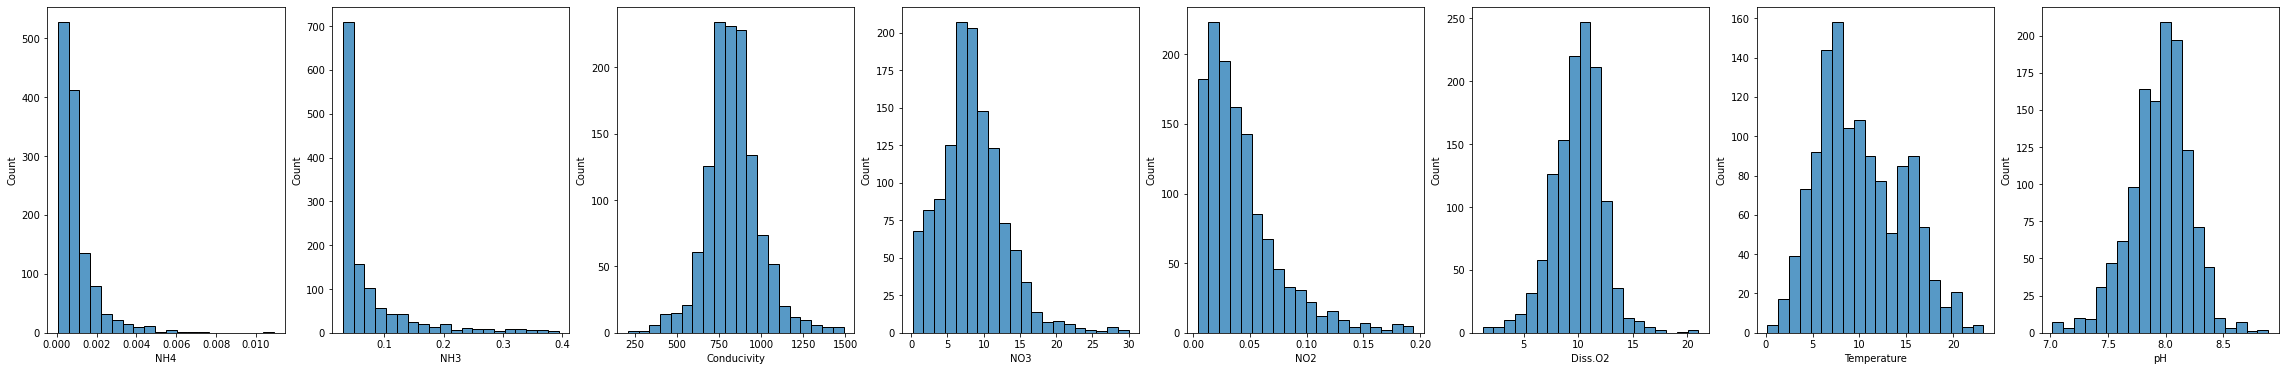

In [240]:
# Check count for each parameter

wD_sel2 = wD_clean.iloc[:,wD_clean.columns.get_loc("NH4"):wD_clean.columns.get_loc("pH")+1]

fig = plt.figure(1,figsize=(40,6))

for i, col in enumerate(wD_sel2.columns,1):
  fig.add_subplot(1,8,i,)
  sns.histplot(data=wD_sel2, x=col, bins=20)

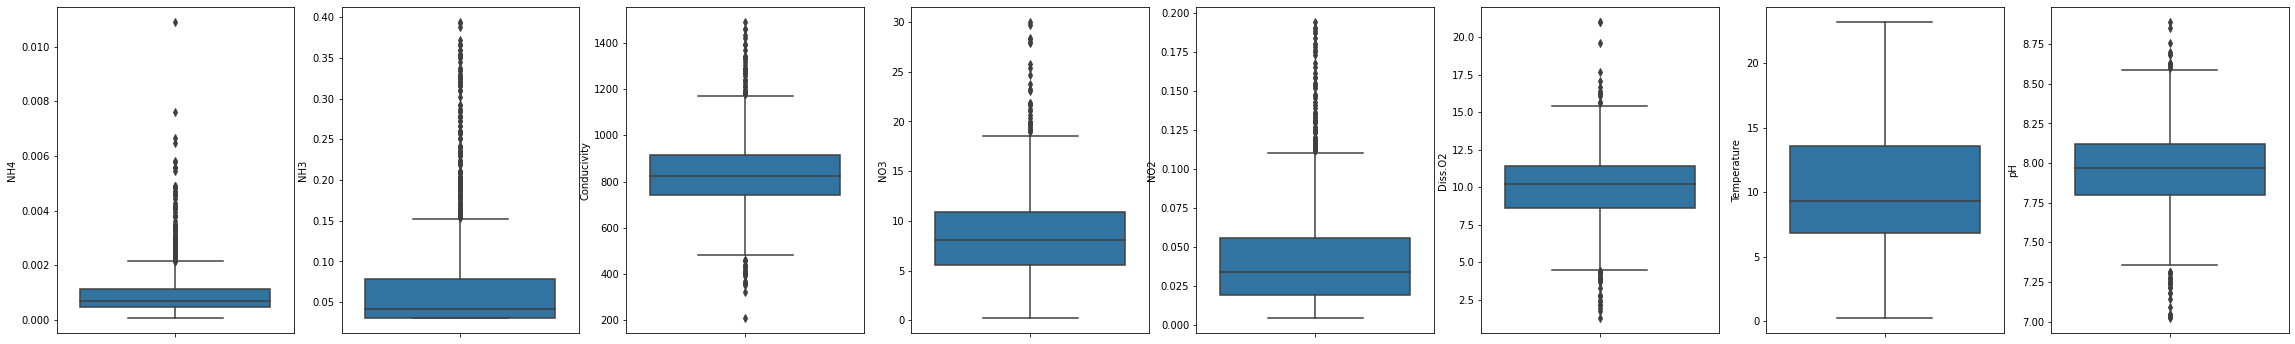

In [241]:
# Check count for each parameter

fig = plt.figure(1,figsize=(40,6))

for i, col in enumerate(wD_sel2.columns,1):
  fig.add_subplot(1,8,i,)
  sns.boxplot(data=wD_sel2, y=col)

## Manova

Null Hypothesis (H0) — All parameter combinations are equal in terms of mean value.

Alternative Hypothesis (HA) — Some parameter combinations have greater mean value.



---

Put very simply — the Null Hypothesis (H0) is a hypothesis that claims that there is no statistically significant relationship between variables, while the Alternative Hypothesis (HA) claims that there is a statistically significant relationship between variables.

In [305]:
# By region
tukey_results=sm.stats.multicomp.pairwise_tukeyhsd(endog=wD_wide['NO3'],groups=wD_wide['Region'],alpha=0.05)
print(tukey_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
Region1 Region2   2.0288  0.001  1.3195 2.7381   True
Region1 Region3   0.5822 0.1345 -0.1307 1.2951  False
Region2 Region3  -1.4466  0.001 -2.1701 -0.723   True
-----------------------------------------------------


In [304]:
# By season
tukey_results=sm.stats.multicomp.pairwise_tukeyhsd(endog=wD_wide['pH'],groups=wD_wide['Seasons'],alpha=0.05)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Autumn Spring   0.1442  0.001  0.0801  0.2084   True
Autumn Summer   0.0363 0.5447 -0.0345   0.107  False
Autumn Winter   0.0708 0.0181  0.0086   0.133   True
Spring Summer  -0.1079 0.0012 -0.1826 -0.0333   True
Spring Winter  -0.0734  0.024   -0.14 -0.0068   True
Summer Winter   0.0345 0.6016 -0.0384  0.1075  False
----------------------------------------------------


In [306]:
# By season
tukey_results=sm.stats.multicomp.pairwise_tukeyhsd(endog=wD_wide['NH4'],groups=wD_wide['Seasons'],alpha=0.05)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Autumn Spring   0.0005 0.7659  -0.001  0.002  False
Autumn Summer   0.0015 0.0888 -0.0001 0.0031  False
Autumn Winter     -0.0    0.9 -0.0015 0.0014  False
Spring Summer    0.001 0.4837 -0.0008 0.0027  False
Spring Winter  -0.0006 0.7699 -0.0021  0.001  False
Summer Winter  -0.0015 0.0991 -0.0032 0.0002  False
---------------------------------------------------


In [307]:
# By season
tukey_results=sm.stats.multicomp.pairwise_tukeyhsd(endog=wD_wide['Diss.O2'],groups=wD_wide['Seasons'],alpha=0.05)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Autumn Spring   2.0968  0.001  1.7046   2.489   True
Autumn Summer   -0.666  0.001 -1.0984 -0.2335   True
Autumn Winter   1.7425  0.001  1.3623  2.1227   True
Spring Summer  -2.7627  0.001 -3.2188 -2.3067   True
Spring Winter  -0.3542 0.1134 -0.7611  0.0527  False
Summer Winter   2.4085  0.001  1.9627  2.8543   True
----------------------------------------------------


## Pair Plot with Seasons

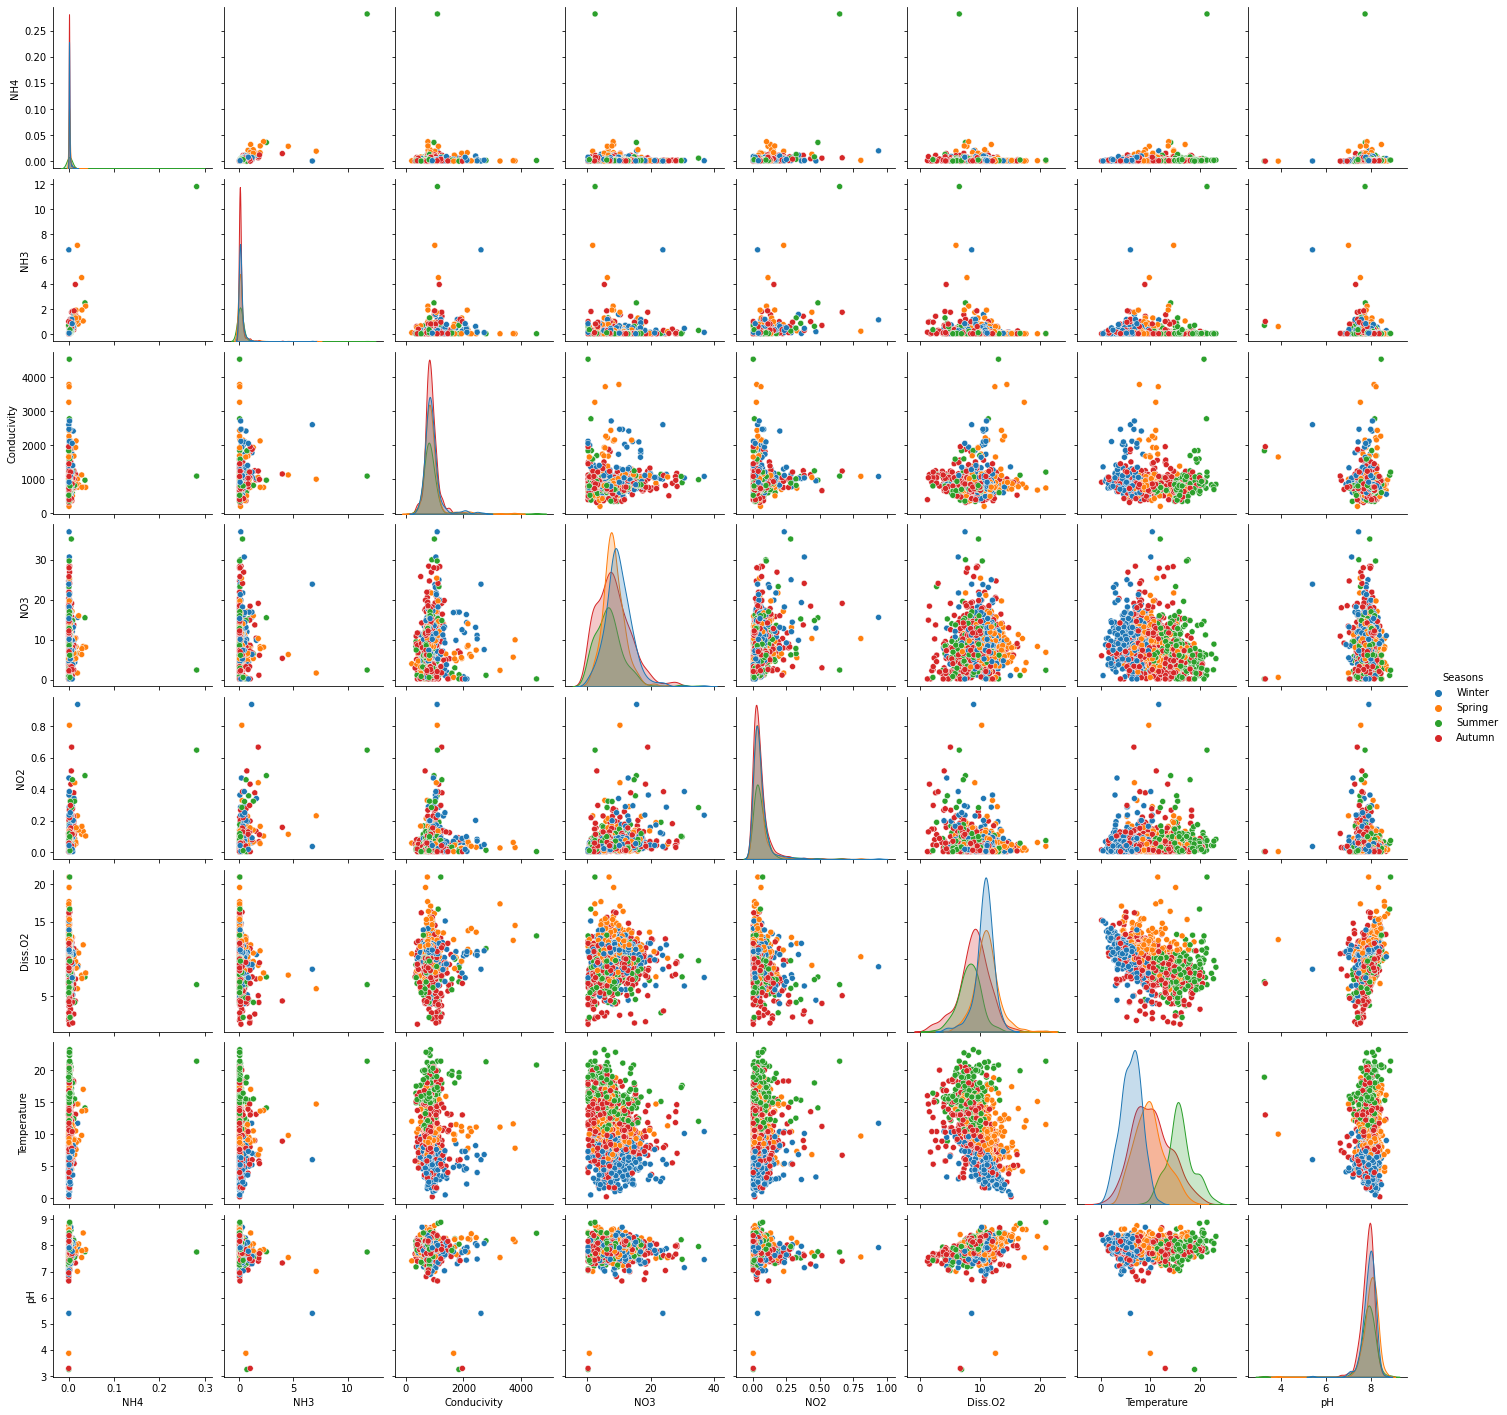

In [23]:
# Pair plot of raw data

sns.pairplot(wD_wide, hue='Seasons')

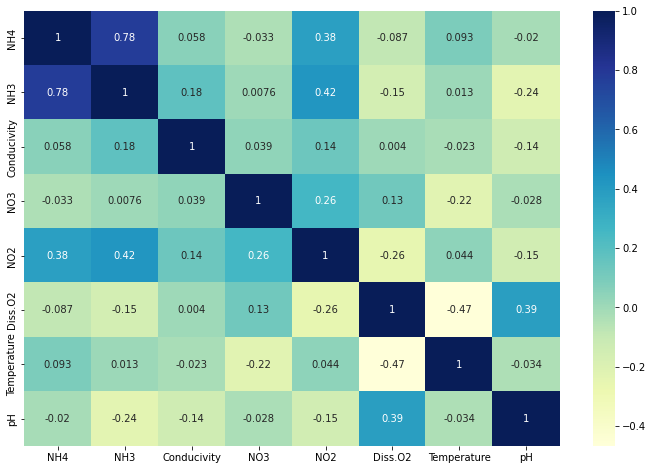

In [72]:
cor_matrix=wD_wide.corr(method='pearson')
cor_matrix.round(2)

plt.figure(figsize=(12,8))
sns.heatmap(cor_matrix, annot=True, cmap="YlGnBu");

In [273]:
# Scale the parameters using the clean data

# Prepare the scaling method
scaler = preprocessing.StandardScaler()

# Get numeric data
num_wD = wD_clean.select_dtypes(exclude=['object','datetime64'])

# Update the cols with their normalized values
wD_scaled = wD_clean.copy()
wD_scaled[num_wD.columns] = scaler.fit_transform(num_wD)

wD_scaled.info()

# Had to change from the data course, because that one was getting less rows for any attached data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 2218
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   sample.samplingPoint.notation  1254 non-null   object        
 1   Location_east                  1254 non-null   object        
 2   sample.sampleDateTime          1254 non-null   datetime64[ns]
 3   NH4                            1254 non-null   float64       
 4   NH3                            1254 non-null   float64       
 5   Conducivity                    1254 non-null   float64       
 6   NO3                            1254 non-null   float64       
 7   NO2                            1254 non-null   float64       
 8   Diss.O2                        1254 non-null   float64       
 9   Temperature                    1254 non-null   float64       
 10  pH                             1254 non-null   float64       
 11  Seasons          

In [274]:
wD_sel.columns

Index(['NH4', 'NH3', 'Conducivity', 'NO3', 'NO2', 'Diss.O2', 'Temperature',
       'pH'],
      dtype='object')

In [275]:
wD_scaled.describe()

NH4           NH3   Conducivity           NO3           NO2  \
count  1.254000e+03  1.254000e+03  1.254000e+03  1.254000e+03  1.254000e+03   
mean  -1.189904e-16 -2.365643e-16 -3.513050e-16 -7.932694e-17  1.076580e-16   
std    1.000399e+00  1.000399e+00  1.000399e+00  1.000399e+00  1.000399e+00   
min   -9.947161e-01 -6.029063e-01 -3.956908e+00 -1.838954e+00 -1.153072e+00   
25%   -5.609646e-01 -6.029063e-01 -5.885988e-01 -6.267743e-01 -7.035016e-01   
50%   -3.229303e-01 -4.265454e-01 -5.676051e-02 -7.028150e-02 -2.554277e-01   
75%    1.584280e-01  1.172341e-01  5.130662e-01  5.607466e-01  3.923720e-01   
max    1.048383e+01  4.746708e+00  4.159957e+00  4.842323e+00  4.532007e+00   

            Diss.O2   Temperature            pH  
count  1.254000e+03  1.254000e+03  1.254000e+03  
mean  -4.362982e-16  3.059753e-16  2.765110e-15  
std    1.000399e+00  1.000399e+00  1.000399e+00  
min   -3.790519e+00 -2.221677e+00 -3.600226e+00  
25%   -5.826696e-01 -7.334745e-01 -5.771562e-01  
50%    1.023966e-01 -1.697613e-01  8.171796e-02  
75%    6.243518e-01  7.998254e-01  6.630775e-01  
max    4.799993e+00  2.964484e+00  3.647390e+00

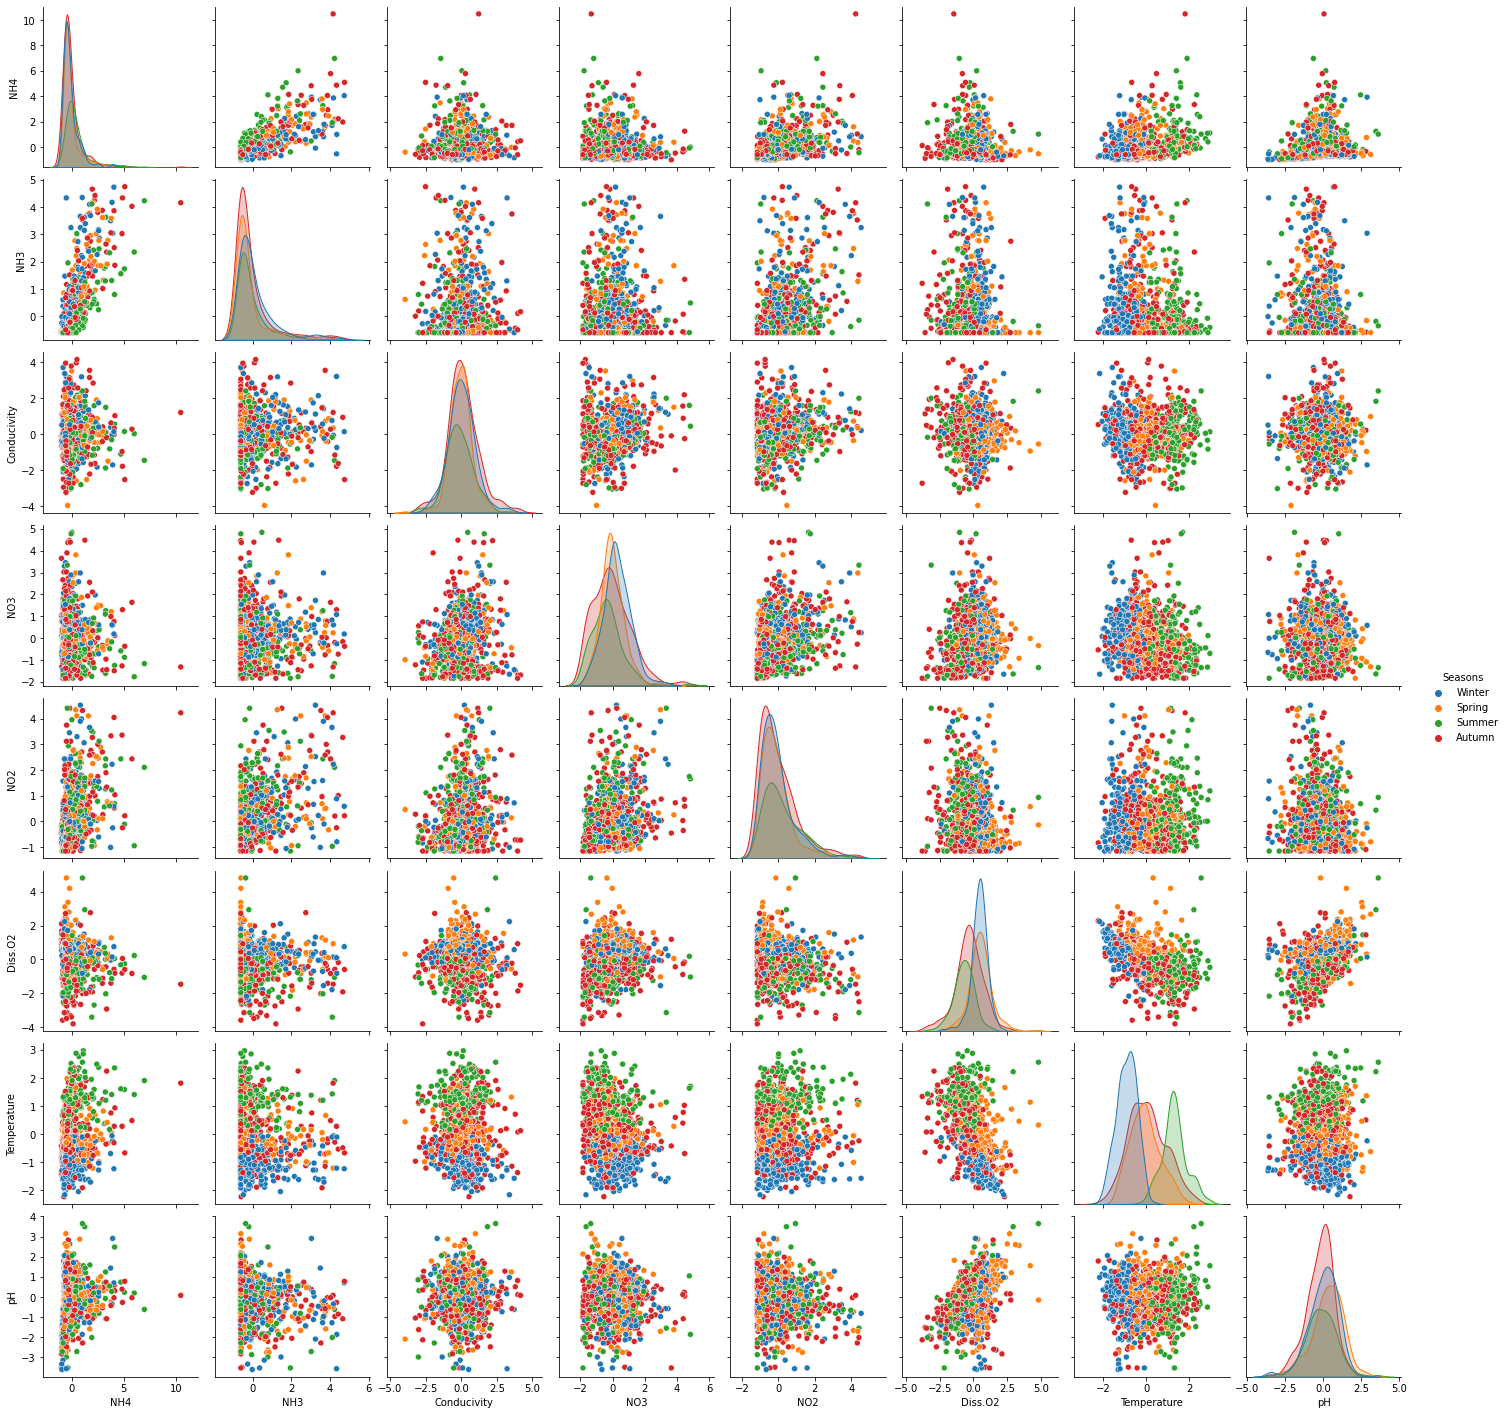

In [276]:
sns.pairplot(wD_scaled, hue='Seasons')

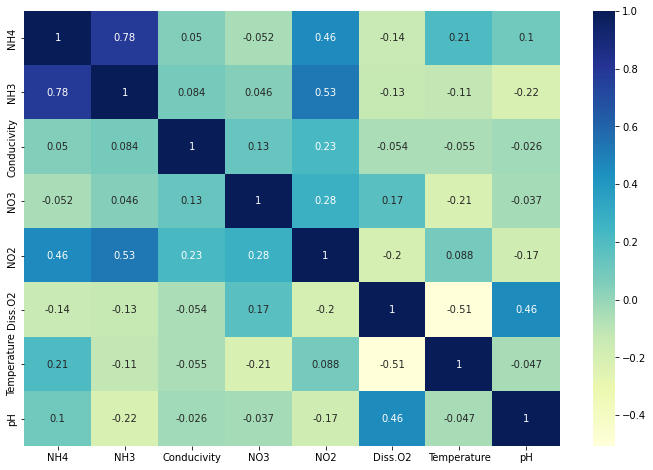

In [16]:
cor_matrix=wD_scaled.corr(method='pearson')
cor_matrix.round(2)

plt.figure(figsize=(12,8))
sns.heatmap(cor_matrix, annot=True, cmap="YlGnBu");

From the pairplots, we can see that the Diss.O2 and Temperature are inversely correlated.
Also NH3 is correlated with NH4, which is also expected.
There does not seem to exist any seasonality clusters except when looking at temperature, since temperature is directly correlated to seasons.

## Pair Plot with Region

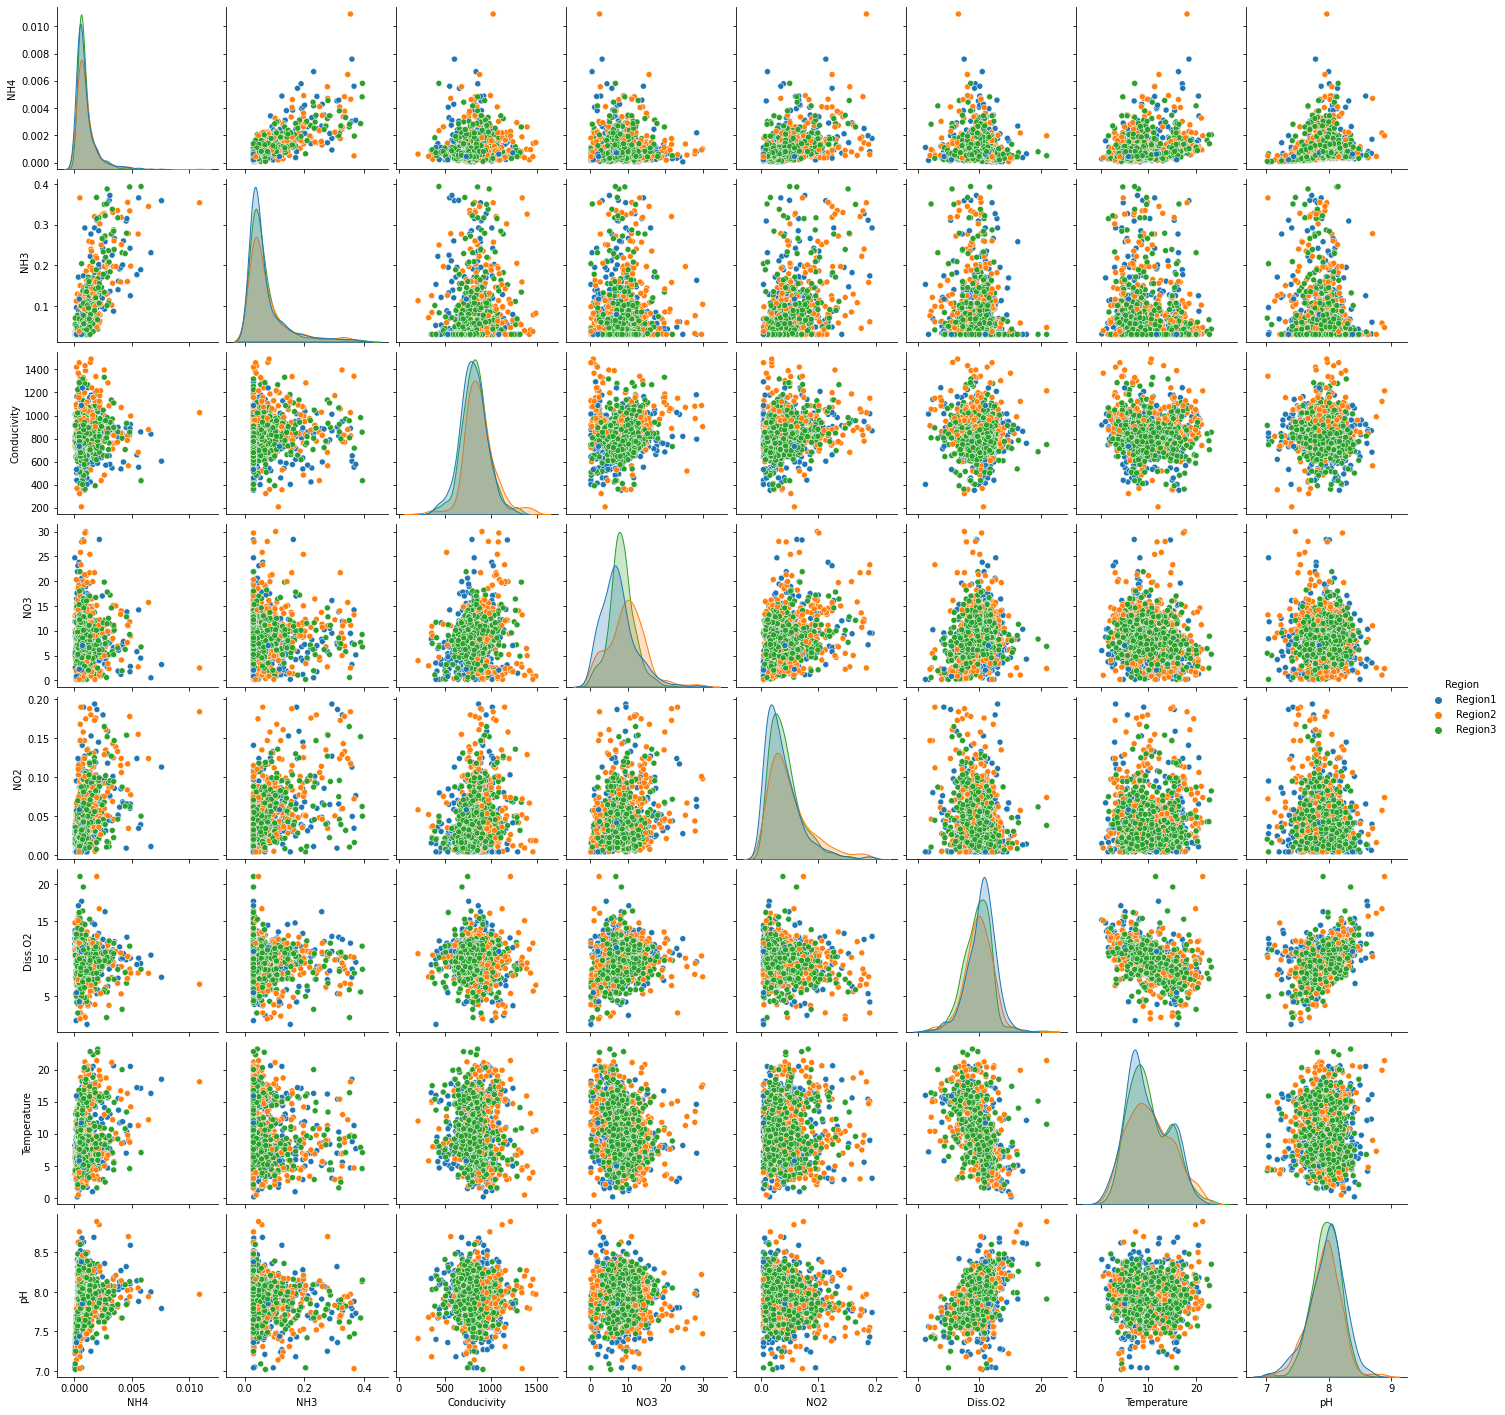

In [244]:
# Pair plot of clean data

sns.pairplot(wD_clean, hue='Region')

Region does not seem to affect the values of the parameters.

## PCA

### First Steps

In [93]:
def standardize(my_components,my_data,func_scaler):
  # Create the model
  mdl_comp = my_components
  
  pca_pipe = make_pipeline(func_scaler, 
                        decomposition.PCA(n_components=mdl_comp))
  num_wD = my_data.select_dtypes(exclude=['object','datetime64'])
  wD_model = pca_pipe.fit(num_wD)
  wD_loadings = pca_pipe.transform(num_wD)

  # Plot the PCA components explanation
  fig=plt.figure(figsize=(16,5))

  plt.plot(wD_model.steps[1][1].explained_variance_ratio_)
  plt.xlabel('number of components')
  plt.ylabel('cumulative explained variance');
  #plt.yscale('log')

  # Print the PCA variance exmplanations
  print(np.cumsum(wD_model.steps[1][1].explained_variance_ratio_))
  print('1st PCA {}, 2nd PCA {}, 3rd PCA {}, 4th PCA {} variance explanation.'.format(100*wD_model.steps[1][1].explained_variance_ratio_[0],
                                                                                100*wD_model.steps[1][1].explained_variance_ratio_[1],
                                                                                100*wD_model.steps[1][1].explained_variance_ratio_[2],
                                                                                100*wD_model.steps[1][1].explained_variance_ratio_[3]))

[0.28907666 0.48520024 0.63436951 0.75762601 0.86318801 0.93089785
 0.97734093 1.        ]
1st PC 28.907666150608758, 2nd PC 19.612358038834046, 3rd PC 14.916926853171175, 4th PC 12.325650218321565 variance explanation.
[0.29773754 0.50873379 0.6679659  0.79019573 0.89380898 0.94651513
 0.98789503 1.        ]
1st PC 29.773753972176664, 2nd PC 21.099625406914754, 3rd PC 15.923210970621577, 4th PC 12.222982891209005 variance explanation.


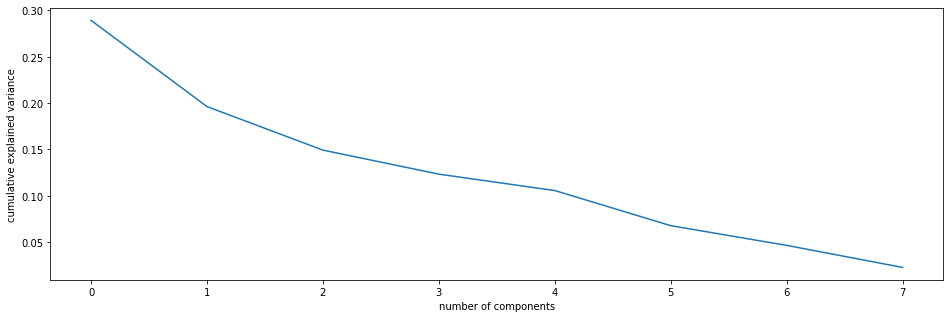

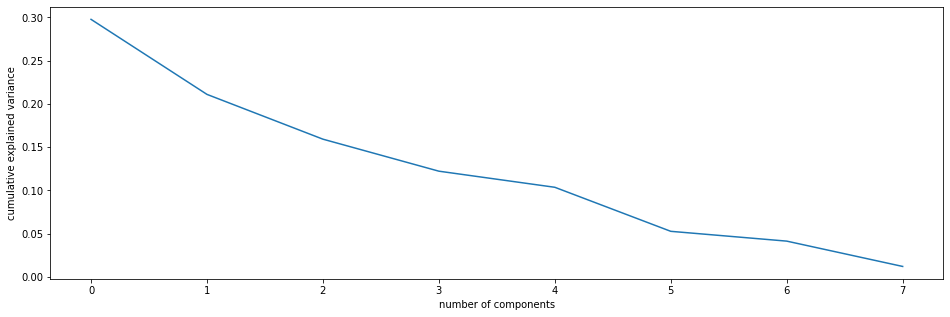

In [101]:
#Standard Scaler
standardize(8,wD_wide,preprocessing.StandardScaler())
standardize(8,wD_clean,preprocessing.StandardScaler())

[0.84626128 0.94387971 0.96287525 0.97939916 0.98853145 0.99450376
 0.9982086  1.        ]
1st PC 84.62612784168945, 2nd PC 9.761843607581094, 3rd PC 1.8995532895257972, 4th PC 1.6523908360817199 variance explanation.
[0.47027821 0.60612005 0.73919536 0.83619769 0.91370518 0.95847287
 0.98415099 1.        ]
1st PC 47.02782059088398, 2nd PC 13.584184311915937, 3rd PC 13.307531302678449, 4th PC 9.700232686765045 variance explanation.


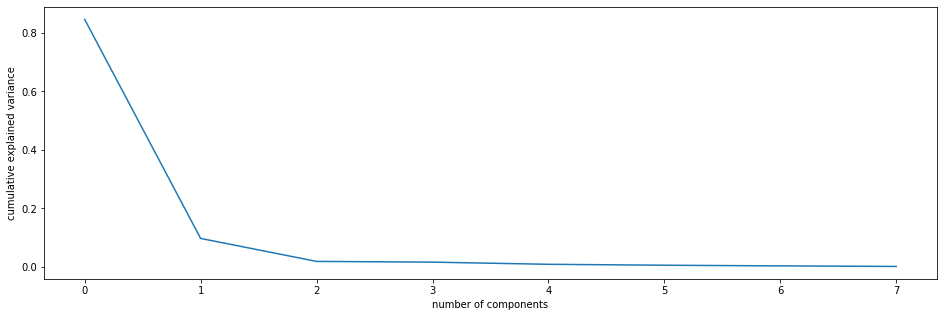

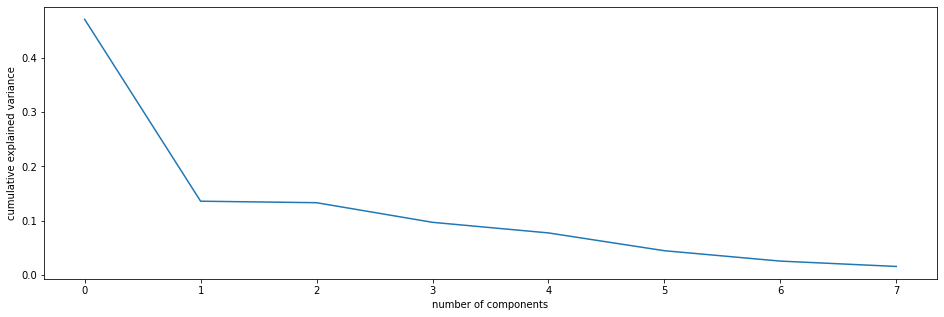

In [100]:
#Robust Scaler
standardize(8,wD_wide,preprocessing.RobustScaler())
standardize(8,wD_clean,preprocessing.RobustScaler())

[0.50367036 0.6944541  0.83012161 0.89560393 0.94610941 0.97920813
 0.99757526 1.        ]
1st PC 50.367036132936605, 2nd PC 19.07837392846851, 3rd PC 13.56675061872527, 4th PC 6.548232202981194 variance explanation.
[0.3209408  0.57004695 0.70690437 0.82232244 0.90244187 0.96202821
 0.99295253 1.        ]
1st PC 32.094079803260165, 2nd PC 24.910615138306838, 3rd PC 13.68574219350917, 4th PC 11.541807321248703 variance explanation.


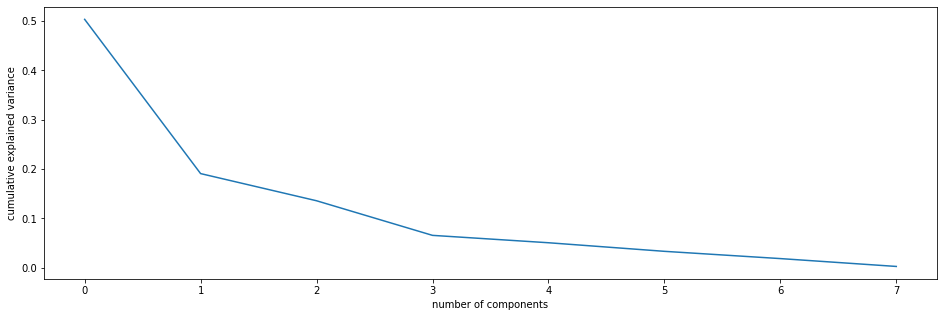

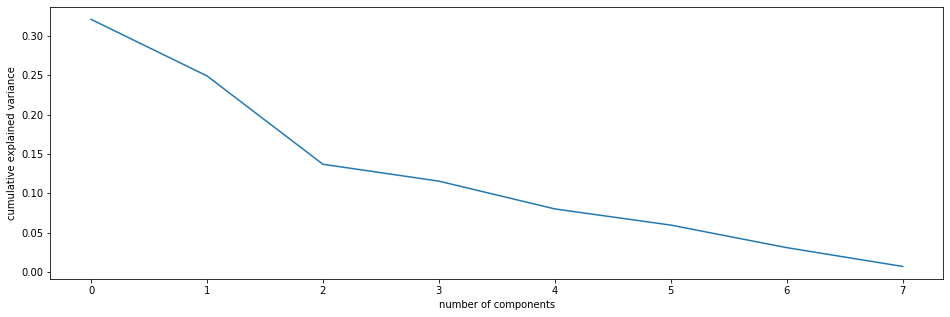

In [102]:
#Min Max Scaler
standardize(8,wD_wide,preprocessing.MinMaxScaler())
standardize(8,wD_clean,preprocessing.MinMaxScaler())

[0.52071166 0.72037249 0.84683921 0.91264246 0.9621469  0.98296202
 0.9974422  1.        ]
1st PC 52.07116582692144, 2nd PC 19.96608346155763, 3rd PC 12.646672174196896, 4th PC 6.5803248390651135 variance explanation.
[0.34437994 0.63388031 0.78957493 0.86882525 0.93226468 0.98516809
 0.99729448 1.        ]
1st PC 34.43799398308677, 2nd PC 28.950037168894298, 3rd PC 15.56946193439568, 4th PC 7.92503160150026 variance explanation.


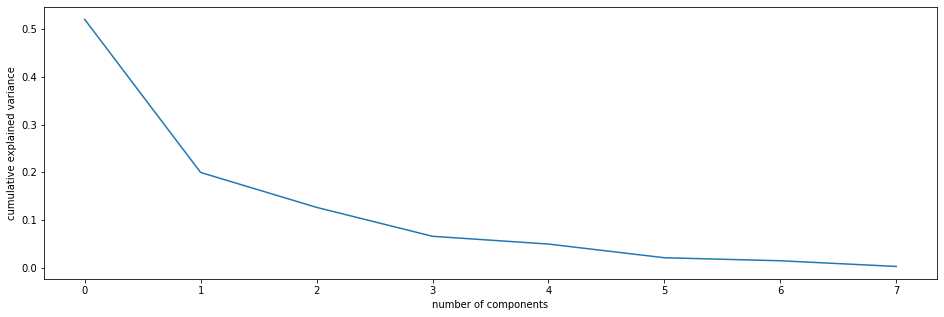

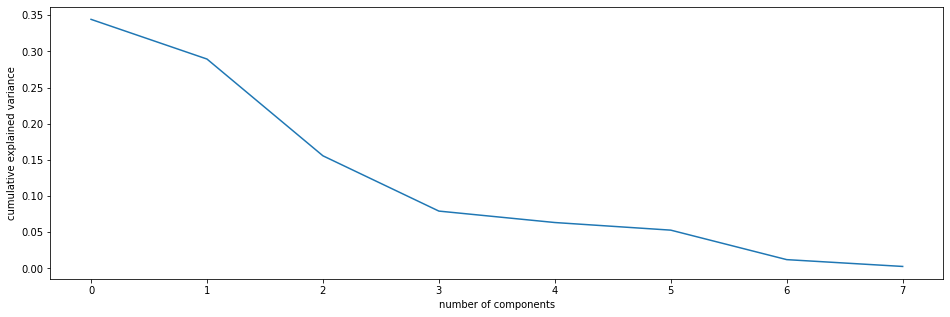

In [99]:
#MaxAbsScaler
standardize(8,wD_wide,preprocessing.MaxAbsScaler())
standardize(8,wD_clean,preprocessing.MaxAbsScaler())

### Analysing the PCA

It seems that after 4 components the model improves but not by much.\
Let's use the robustscaler with the war data as the data has a lot of outliers. 

In [263]:
# Parameters of the model
mdl_comp = 4
num_wD = wD_clean.select_dtypes(exclude=['object','datetime64'])

# PCA model with selected 
pca_pipe = make_pipeline(preprocessing.MaxAbsScaler(), decomposition.PCA(n_components=mdl_comp))
wD_model = pca_pipe.fit(num_wD)

# PCA converted dataframe
wD_loadings = pca_pipe.transform(num_wD)
wD_loadings=pd.DataFrame(wD_loadings, columns=['PCA1','PCA2','PCA3','PCA4'])
wD_fPCA = pd.concat([wD_loadings, wD_wide['Seasons']], axis = 1)
wD_fPCA = pd.concat([wD_fPCA, wD_wide['Region']], axis = 1)

wD_fPCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830 entries, 0 to 2218
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PCA1     1254 non-null   float64
 1   PCA2     1254 non-null   float64
 2   PCA3     1254 non-null   float64
 3   PCA4     1254 non-null   float64
 4   Seasons  1406 non-null   object 
 5   Region   1406 non-null   object 
dtypes: float64(4), object(2)
memory usage: 100.1+ KB


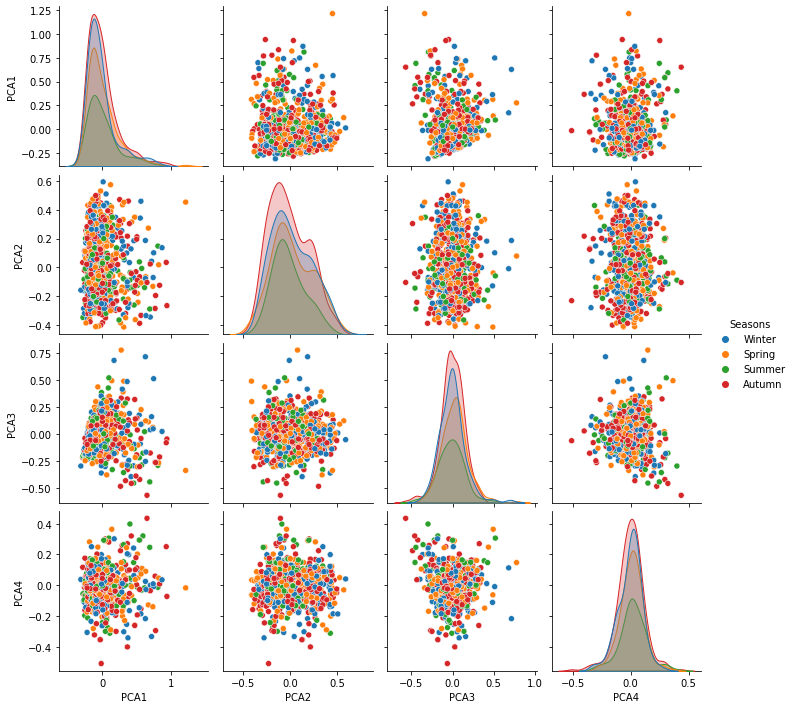

In [143]:
sns.pairplot(data=wD_fPCA, hue='Seasons')

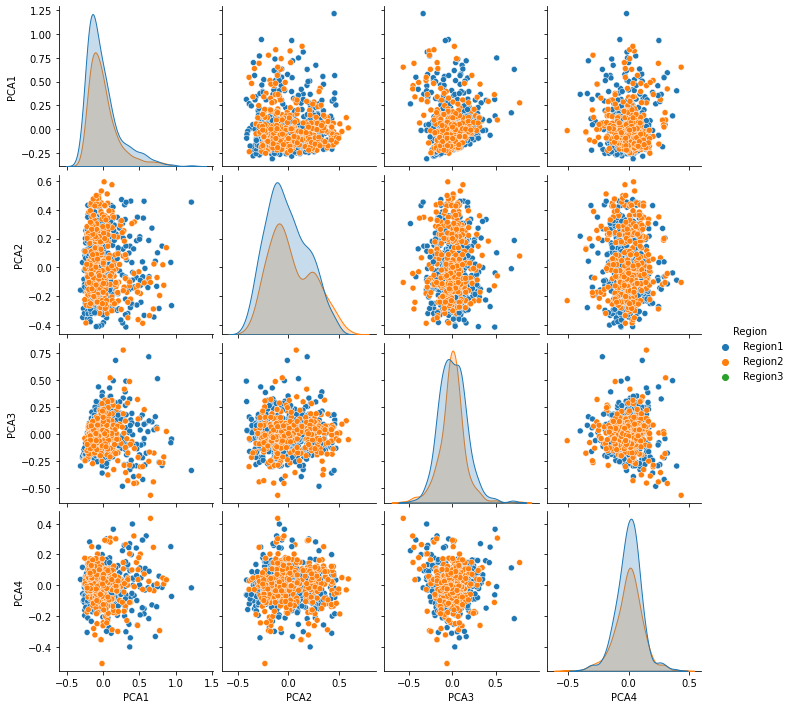

In [247]:
sns.pairplot(data=wD_fPCA, hue='Region')

## PCA for 2 variables

In [308]:
# Scale the parameters using the clean data

# Prepare the scaling method
scaler = preprocessing.StandardScaler()

# Get numeric data
num_wD = wD_clean.select_dtypes(exclude=['object','datetime64'])

# Update the cols with their normalized values
wD_scaled = wD_clean.copy()
wD_scaled[num_wD.columns] = scaler.fit_transform(num_wD)

wD_scaled.info()

# Had to change from the data course, because that one was getting less rows for any attached data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 2218
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   sample.samplingPoint.notation  1254 non-null   object        
 1   Location_east                  1254 non-null   object        
 2   sample.sampleDateTime          1254 non-null   datetime64[ns]
 3   NH4                            1254 non-null   float64       
 4   NH3                            1254 non-null   float64       
 5   Conducivity                    1254 non-null   float64       
 6   NO3                            1254 non-null   float64       
 7   NO2                            1254 non-null   float64       
 8   Diss.O2                        1254 non-null   float64       
 9   Temperature                    1254 non-null   float64       
 10  pH                             1254 non-null   float64       
 11  Seasons          

In [316]:
pca = decomposition.PCA()
pca.fit(wD_scaled[['Diss.O2','Temperature']])

pca_loadings=pca.transform(wD_scaled[['Diss.O2','Temperature']])

print('The PCA compoents (vectors) are:', pca.components_)

print('The shape of the loading matrix is {}'.format(pca_loadings. shape))

print('The first PCA explains {} and second PCA explins {} of all the varience.'.format(100*pca.explained_variance_ratio_[0],100*pca.explained_variance_ratio_[1]))

The PCA compoents (vectors) are: [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
The shape of the loading matrix is (1254, 2)
The first PCA explains 75.31778779106679 and second PCA explins 24.682212208933212 of all the varience.


In [317]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='<-',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v0, v1, arrowprops=arrowprops)

# plot data

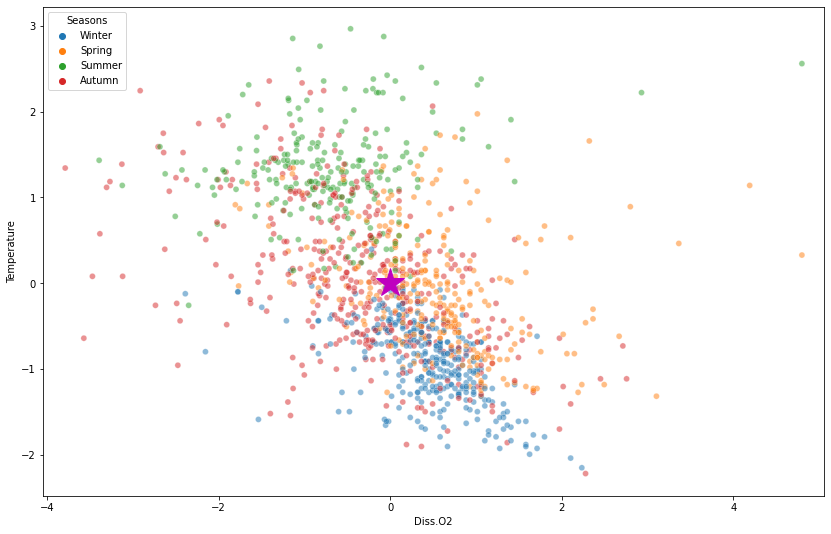

In [325]:
plt.figure(figsize=(14,9))

sns.scatterplot(data=wD_scaled, x= 'Diss.O2',y ='Temperature', hue = wD_scaled['Seasons'], alpha =0.5)

#plt.plot(X,y_fit, color='red', )
plt.plot(pca.mean_[0],pca.mean_[1], color='m',marker='*', markersize=30)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector  * np.sqrt(length)
    #draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal');

plt.show()

Text(0, 0.5, 'PCA 2')

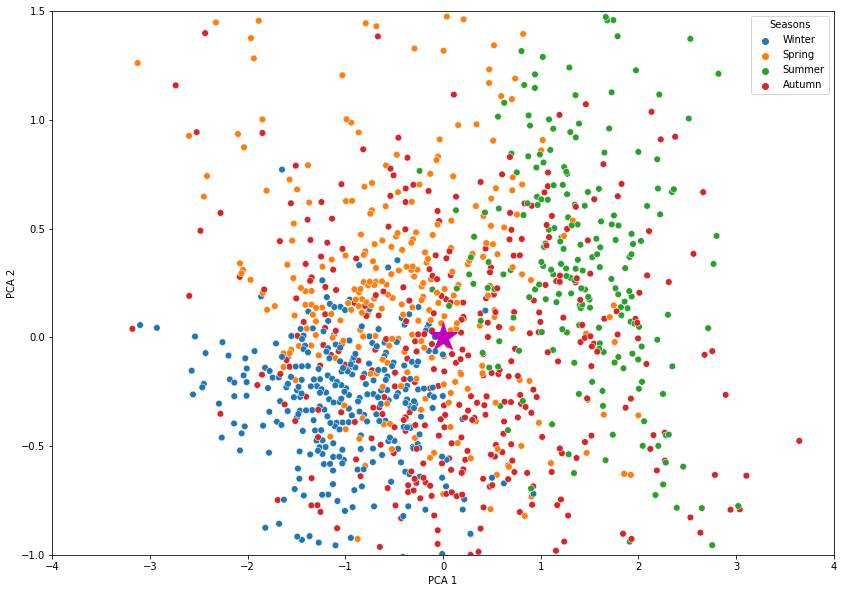

In [326]:
# Here, a best-fitting line is defined as one that minimizes the average squared distance from the points to the line. 
# These directions constitute an orthonormal basis in which different individual dimensions of the data are linearly uncorrelated.

fig=plt.figure(figsize=(14,10))

fig.add_subplot(1,1,1)
sns.scatterplot(x=pca_loadings[:,0], y=pca_loadings[:,1],hue=wD_scaled['Seasons'], s=45)
plt.plot(pca.mean_[0],pca.mean_[1], color='m',marker='*', markersize=30)

#draw_vector((0,0),(pca.explained_variance_ratio_[0],0))
#draw_vector((0,0),(0,pca.explained_variance_ratio_[1]))

plt.xlim((-4,4))
plt.ylim((-1,1.5))
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# The PCA tried to separate higher from lower temperature values. Summer is far from winter.

## Clustering StandardScaler

In [353]:
print(wD_scaled.max())

sample.samplingPoint.notation            AN-MISCTM09
Location_east                                 603700
sample.sampleDateTime            2016-12-19 15:15:00
NH4                                        10.483829
NH3                                         4.746708
Conducivity                                 4.159957
NO3                                         4.842323
NO2                                         4.532007
Diss.O2                                     4.799993
Temperature                                 2.964484
pH                                           3.64739
Seasons                                       Winter
Region                                       Region3
cluster_id_scaled                                  3
season_int                                       3.0
dtype: object


In [364]:
wD_selected = wD_scaled.select_dtypes(exclude=['object','datetime64'])

km_clf = cluster.KMeans(n_clusters=4,  tol=1e-2, max_iter=100)

clusted_wD=km_clf.fit(wD_selected)

clusted_wD.labels_.shape

(1254,)

In [365]:
wD_scaled['cluster_id_scaled']=clusted_wD.labels_
wD_scaled.head()

sample.samplingPoint.notation Location_east sample.sampleDateTime       NH4  \
0                      AN-01M02        463800   2016-01-13 11:13:00 -0.645599   
1                      AN-01M02        463800   2016-02-18 13:51:00 -0.814868   
2                      AN-01M02        463800   2016-03-14 13:18:00 -0.444592   
3                      AN-01M02        463800   2016-06-03 11:42:00 -0.031999   
4                      AN-01M02        463800   2016-06-21 10:37:00 -0.444592   

        NH3  Conducivity       NO3       NO2   Diss.O2  Temperature        pH  \
0 -0.602906    -1.816892 -0.929959 -0.847873  0.319878    -1.116799  1.205680   
1 -0.529423    -2.095474 -1.272934 -1.009449  0.450367    -1.049154 -1.042244   
2 -0.470636    -1.380025 -0.847018 -0.940629  1.015818    -0.688377  0.197990   
3 -0.294275    -0.816529 -1.165334 -0.482831  0.232885     0.078273  1.399466   
4 -0.397152    -1.816892 -1.369325 -0.464878 -0.436957     1.025311 -0.964729   

  Seasons   Region  cluster_id_scaled  season_int  
0  Winter  Region1                  1         3.0  
1  Winter  Region1                  1         3.0  
2  Spring  Region1                  1         2.0  
3  Summer  Region1                  2         0.0  
4  Summer  Region1                  2         0.0

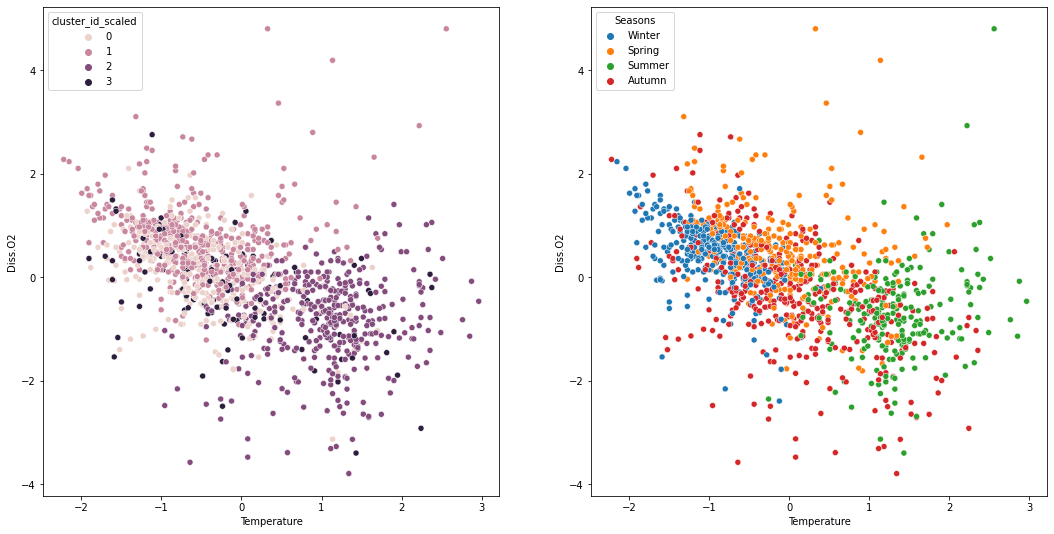

In [366]:
fig=plt.figure(figsize=(18,9))

fig.add_subplot(1,2,1)
sns.scatterplot(data=wD_scaled, x='Temperature', y = 'Diss.O2',hue='cluster_id_scaled' )

fig.add_subplot(1,2,2)
sns.scatterplot(data=wD_scaled, x='Temperature', y = 'Diss.O2',hue='Seasons' )

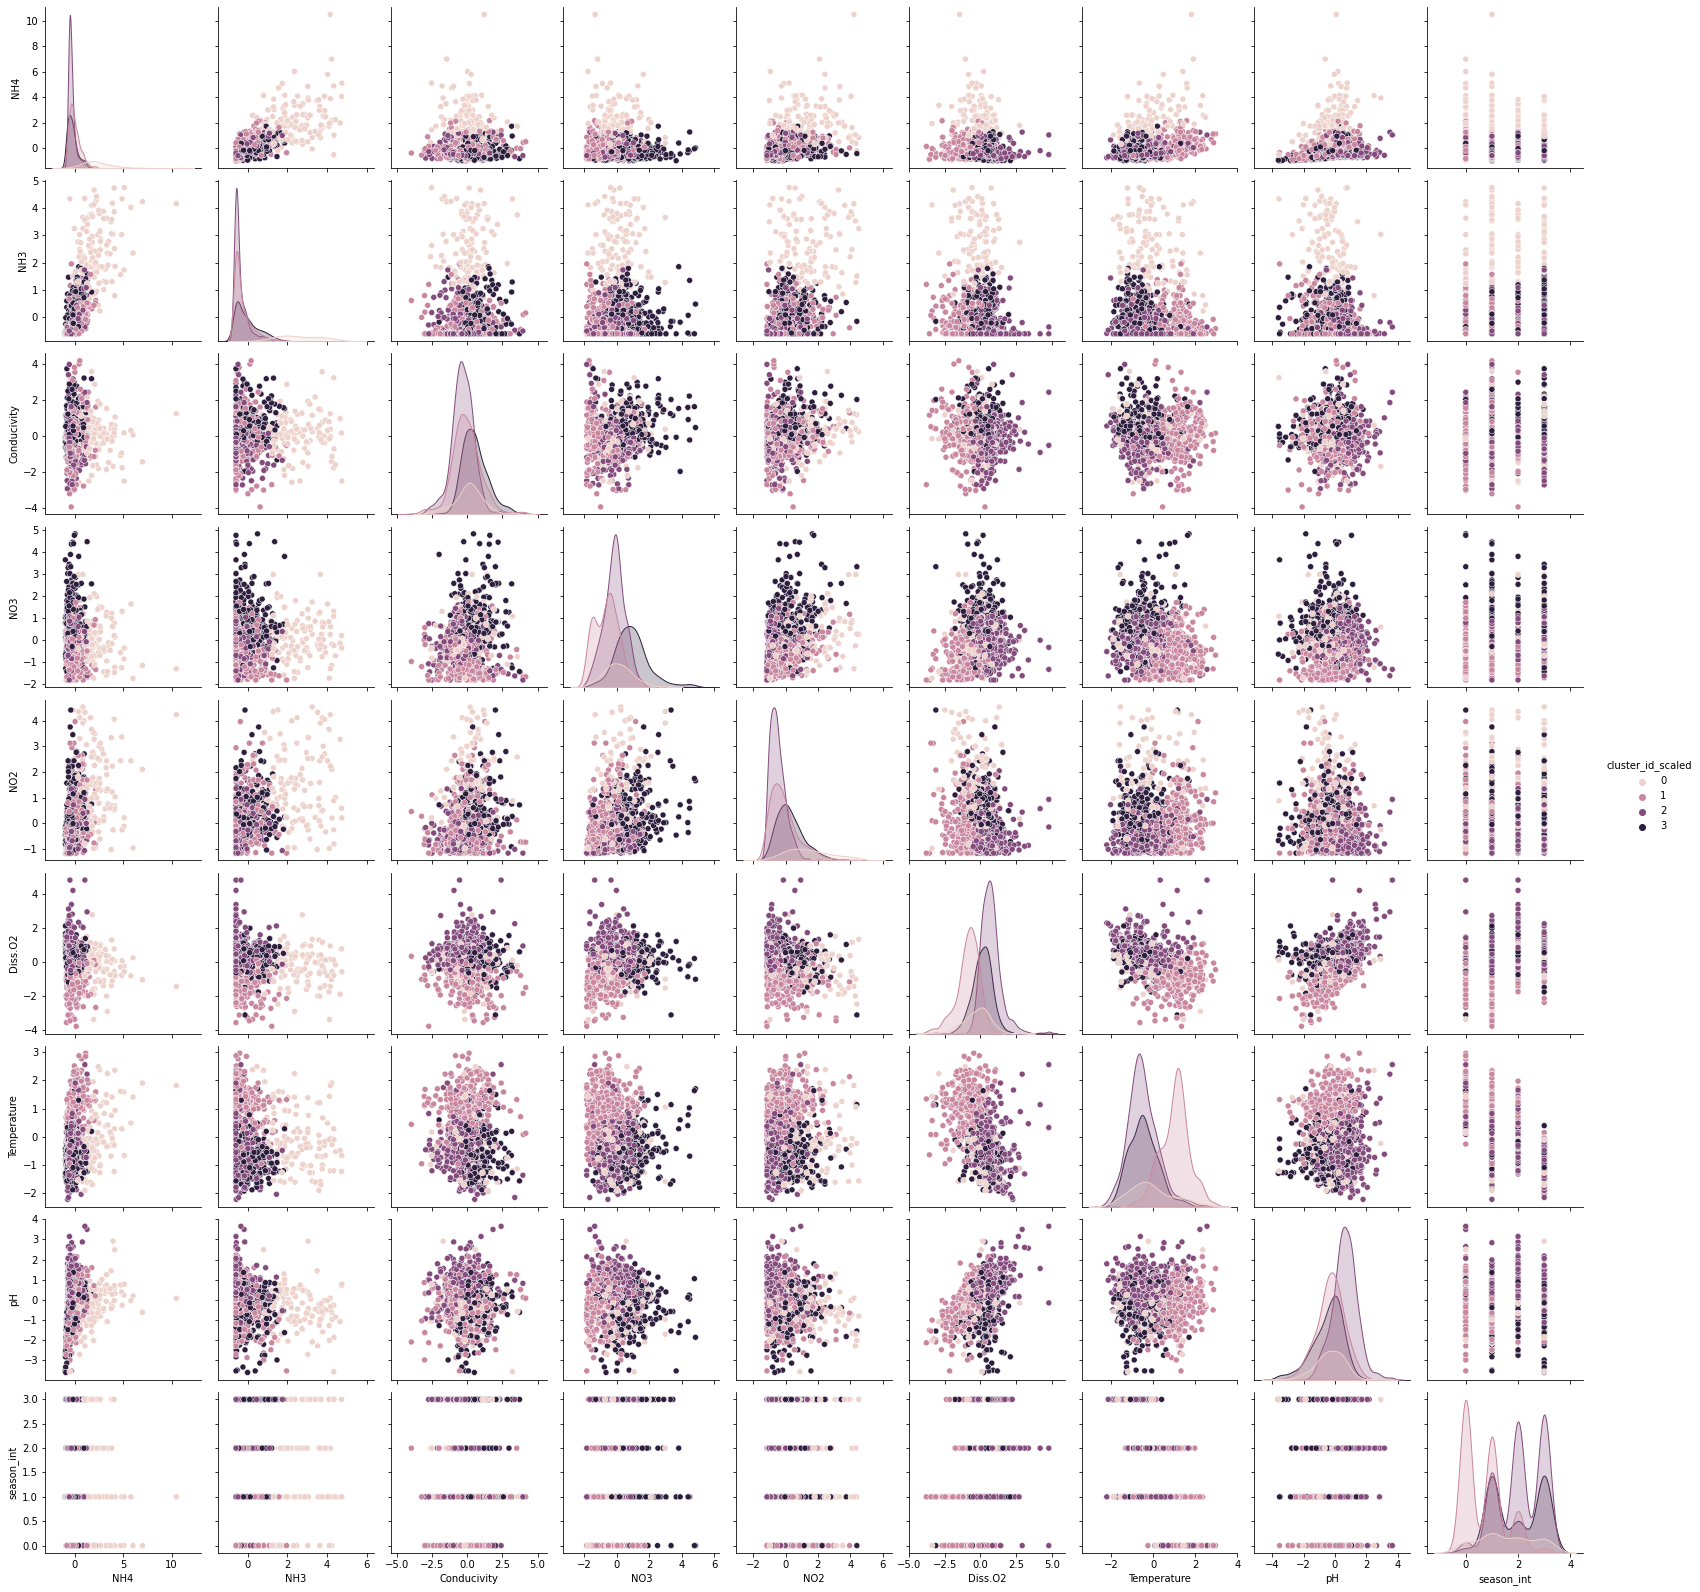

In [357]:
sns.pairplot(wD_scaled,hue='cluster_id_scaled')

### Confusion Matrix

In [367]:
wD_scaled.groupby('Seasons').count()

sample.samplingPoint.notation  Location_east  sample.sampleDateTime  \
Seasons                                                                        
Autumn                             401            401                    401   
Spring                             296            296                    296   
Summer                             225            225                    225   
Winter                             332            332                    332   

         NH4  NH3  Conducivity  NO3  NO2  Diss.O2  Temperature   pH  Region  \
Seasons                                                                       
Autumn   401  401          401  401  401      401          401  401     401   
Spring   296  296          296  296  296      296          296  296     296   
Summer   225  225          225  225  225      225          225  225     225   
Winter   332  332          332  332  332      332          332  332     332   

         cluster_id_scaled  season_int  
Seasons                                 
Autumn                 401         401  
Spring                 296         296  
Summer                 225         225  
Winter                 332         332

In [377]:
wD_scaled.loc[wD_scaled['Seasons']=='Summer', 'season_int'] = 0
wD_scaled.loc[wD_scaled['Seasons']=='Autumn', 'season_int']=1
wD_scaled.loc[wD_scaled['Seasons']=='Spring', 'season_int']=2
wD_scaled.loc[wD_scaled['Seasons']=='Winter', 'season_int']=3

[[  7   3 195  20]
 [120 101 141  39]
 [ 49 170  47  30]
 [119 182   3  28]]


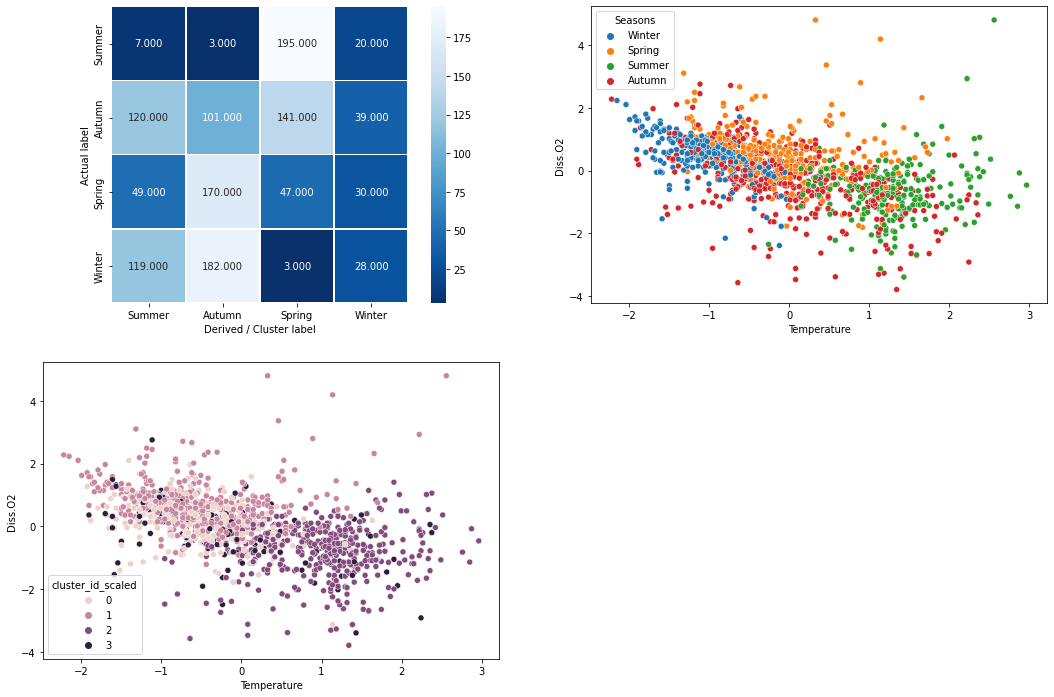

In [378]:
cm = metrics.confusion_matrix(wD_scaled['season_int'], wD_scaled['cluster_id_scaled'])
print(cm)

fig=plt.figure(figsize=(18,12))


fig.add_subplot(2,2,1)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r',
            xticklabels=['Summer','Autumn','Spring','Winter'],
            yticklabels=['Summer','Autumn','Summer','Winter']);
plt.ylabel('Actual label');
plt.xlabel('Derived / Cluster label');

fig.add_subplot(2,2,3)
sns.scatterplot(data=wD_scaled, x='Temperature', y = 'Diss.O2',hue='cluster_id_scaled' )

fig.add_subplot(2,2,2)
sns.scatterplot(data=wD_scaled, x='Temperature', y = 'Diss.O2',hue='Seasons' )

#plt.savefig('Penguins_species_ConfusionSeabornCodementor.png')

## Clustering MaxAbsScaler

In [395]:
# Scale the parameters using the clean data

# Prepare the scaling method
scaler = preprocessing.MaxAbsScaler()

# Get numeric data
num_wD = wD_clean.select_dtypes(exclude=['object','datetime64'])

# Update the cols with their normalized values
wD_scaled = wD_clean.copy()
wD_scaled[num_wD.columns] = scaler.fit_transform(num_wD)

wD_scaled.info()

# Had to change from the data course, because that one was getting less rows for any attached data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 2218
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   sample.samplingPoint.notation  1254 non-null   object        
 1   Location_east                  1254 non-null   object        
 2   sample.sampleDateTime          1254 non-null   datetime64[ns]
 3   NH4                            1254 non-null   float64       
 4   NH3                            1254 non-null   float64       
 5   Conducivity                    1254 non-null   float64       
 6   NO3                            1254 non-null   float64       
 7   NO2                            1254 non-null   float64       
 8   Diss.O2                        1254 non-null   float64       
 9   Temperature                    1254 non-null   float64       
 10  pH                             1254 non-null   float64       
 11  Seasons          

In [396]:
wD_selected = wD_scaled.select_dtypes(exclude=['object','datetime64'])

km_clf = cluster.KMeans(n_clusters=4,  tol=1e-2, max_iter=100)

clusted_wD=km_clf.fit(wD_selected)

clusted_wD.labels_.shape

(1254,)

In [397]:
wD_scaled['cluster_id_scaled']=clusted_wD.labels_
wD_scaled.head()

sample.samplingPoint.notation Location_east sample.sampleDateTime       NH4  \
0                      AN-01M02        463800   2016-01-13 11:13:00  0.034862   
1                      AN-01M02        463800   2016-02-18 13:51:00  0.020183   
2                      AN-01M02        463800   2016-03-14 13:18:00  0.052294   
3                      AN-01M02        463800   2016-06-03 11:42:00  0.088073   
4                      AN-01M02        463800   2016-06-21 10:37:00  0.052294   

        NH3  Conducivity       NO3       NO2   Diss.O2  Temperature        pH  \
0  0.076142     0.366443  0.141667  0.073196  0.509524     0.219828  0.929134   
1  0.088832     0.336913  0.090667  0.045361  0.523810     0.232759  0.863892   
2  0.098985     0.412752  0.154000  0.057216  0.585714     0.301724  0.899888   
3  0.129442     0.472483  0.106667  0.136082  0.500000     0.448276  0.934758   
4  0.111675     0.366443  0.076333  0.139175  0.426667     0.629310  0.866142   

  Seasons   Region  cluster_id_scaled  
0  Winter  Region1                  1  
1  Winter  Region1                  1  
2  Spring  Region1                  1  
3  Summer  Region1                  0  
4  Summer  Region1                  0

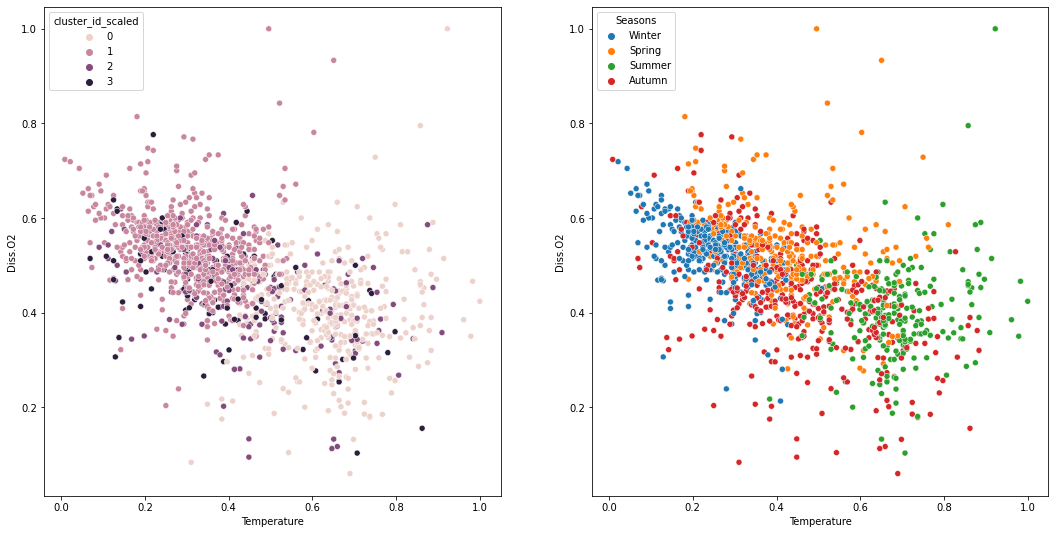

In [398]:
fig=plt.figure(figsize=(18,9))

fig.add_subplot(1,2,1)
sns.scatterplot(data=wD_scaled, x='Temperature', y = 'Diss.O2',hue='cluster_id_scaled' )

fig.add_subplot(1,2,2)
sns.scatterplot(data=wD_scaled, x='Temperature', y = 'Diss.O2',hue='Seasons' )

## Linear Plots over time

(array([735964., 736024., 736085., 736146., 736208., 736269., 736330.]),
 <a list of 7 Text major ticklabel objects>)

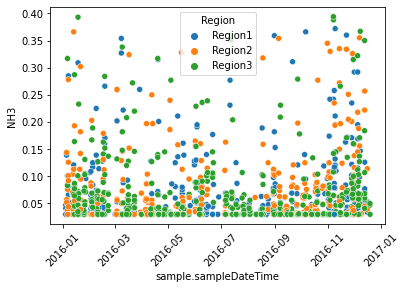

In [290]:
# NH4
sns.scatterplot(data=wD_clean, x='sample.sampleDateTime', y='NH3', hue='Region')
plt.xticks(rotation=45)

(array([735964., 736024., 736085., 736146., 736208., 736269., 736330.]),
 <a list of 7 Text major ticklabel objects>)

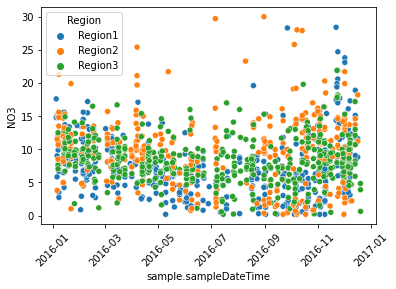

In [291]:
# NO3
sns.scatterplot(data=wD_clean, x='sample.sampleDateTime', y='NO3', hue='Region')
plt.xticks(rotation=45)

(array([735964., 736024., 736085., 736146., 736208., 736269., 736330.]),
 <a list of 7 Text major ticklabel objects>)

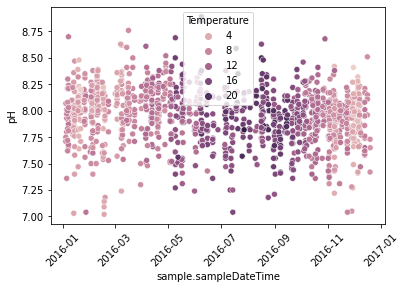

In [302]:
# pH
sns.scatterplot(data=wD_clean, x='sample.sampleDateTime', y='pH', hue='Temperature')
plt.xticks(rotation=45)

(array([735964., 736024., 736085., 736146., 736208., 736269., 736330.]),
 <a list of 7 Text major ticklabel objects>)

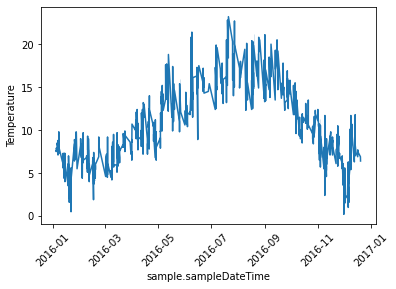

In [148]:
# Temperature
sns.lineplot(data=wD_wide, x='sample.sampleDateTime', y='Temperature')
plt.xticks(rotation=45)

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 <a list of 10 Text major ticklabel objects>)

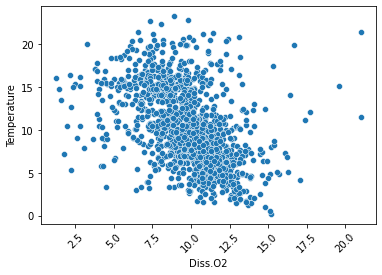

In [284]:
# Temperature
sns.scatterplot(data=wD_wide, x='Diss.O2', y='Temperature')
plt.xticks(rotation=45)

In [272]:
# Long dataset format

wD_wide2 = wD_scaled
wD_long = wD_wide2.melt(id_vars=['sample.sampleDateTime','Location_east','Region','Seasons']).rename(columns=str.title)
wD_long

Sample.Sampledatetime Location_East   Region Seasons Variable     Value
0       2016-01-13 11:13:00        463800  Region1  Winter      NH4 -0.645599
1       2016-02-18 13:51:00        463800  Region1  Winter      NH4 -0.814868
2       2016-03-14 13:18:00        463800  Region1  Spring      NH4 -0.444592
3       2016-06-03 11:42:00        463800  Region1  Summer      NH4 -0.031999
4       2016-06-21 10:37:00        463800  Region1  Summer      NH4 -0.444592
...                     ...           ...      ...     ...      ...       ...
10027   2016-11-08 16:25:00        510000  Region1  Autumn       pH -1.972419
10028   2016-11-30 12:15:00        550000  Region2  Autumn       pH  0.818107
10029   2016-06-15 14:00:00        580000  Region3  Summer       pH -0.344612
10030   2016-07-12 13:10:00        590000  Region3  Summer       pH -2.011177
10031   2016-01-14 11:45:00        600000  Region3  Winter       pH -0.150826

[10032 rows x 6 columns]